In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [2]:
data = pd.read_csv('/kaggle/input/gpbanglalinkrobiairtelteletalk-all-package-bd/All SIM Internet Minutes SMS Package  Details in Bangladesh.csv', encoding = "latin")

In [3]:
data.head()

,SIM Operator,SIM Type,Packages Type,Package Volume \n(Data/ Minutes/ SMS),Validity\n(Days/Hours ),Price\n(BDT)
0,Airtel,Regular SIM,Data,1GB FB + Insta,15 Days,12
1,Airtel,Regular SIM,Data,300MB,3 Days,17
2,Airtel,Regular SIM,Data,700 MB (100MB Bonus),3 Days,29
3,Airtel,Regular SIM,Data,612 MB,3 Days,32
4,Airtel,Regular SIM,Data,612 MB,30 Days,132


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   SIM Operator                          530 non-null    object
 1   SIM  Type                             530 non-null    object
 2   Packages Type                         530 non-null    object
 3   Package Volume 
(Data/ Minutes/ SMS)  530 non-null    object
 4   Validity
(Days/Hours )                530 non-null    object
 5   Price
(BDT)                           530 non-null    object
dtypes: object(6)
memory usage: 40.6+ KB


In [5]:
data.isna().sum().sort_values(ascending=False)

SIM Operator                             334
SIM  Type                                334
Packages Type                            334
Package Volume \n(Data/ Minutes/ SMS)    334
Validity\n(Days/Hours )                  334
Price\n(BDT)                             334
dtype: int64

In [6]:
data.shape

(864, 6)

In [7]:
data.dropna(inplace=True)

In [8]:
data.columns = ['sim', 'sim_type', 'pkg_type', 'pkg_volume', 'validity', 'price']

In [9]:
print(data['sim'].unique())
print(data['sim_type'].unique())
print(data['pkg_type'].unique())

['Airtel' 'Banglalink ' 'GP' 'Robi' 'Robi ' 'Teletalk ']
['Regular SIM ' 'Reactivation SIM ']
['Data ' 'Combo Package ' 'Minutes ' 'SMS' 'Minutes' 'minutes' 'Data']


Compare data packages prices across the different sim providers

In [10]:
data['price'].unique()

array(['12', '17', '29', '32', '132', '38', '49', '57', '101', '63',
       '229', '68', '114', '249', '76', '89', '129', '147', '344', '398',
       '429', '36', '67', '98', '158', '128', '198', '298', '299', '348',
       '498', '548', '598', '648', '799', '293', '295', '297', '601',
       '602', '603', '604', '219', '397', '549', '399', '719', '44',
       '269', '497', '41', '60', '19', '449', '200', '349', '164', '6',
       '8', '14', '18', '28', '34', '48', '9', '10.96', '23', '46', '53',
       '74', '78', '93', '97', '107', '118', '149', '169', '199', '207',
       '228', '278', '307', '499', '574', '15', '37', '47', '25', '5',
       '2', '77', '119', '96', '51', '209', '58', '194', '116', '91',
       '306', '389', '619', '599', '139', '99', '141', '54', '22', '33',
       '547', '1199', '42', '122', '204', '342', '542', '699', '239',
       '462', '512', '388', '27', '66', '117', '157', '197', '137', '88',
       '188', '288', '488', '59', '159', '21', '39', '69', '79', '1

In [11]:
def extract_num(text):
    num = re.findall(r'\d+', text)
    if num:
        return num[0]
    

In [12]:
data = data.astype('str')

convert price to number

In [13]:

data['price'] = data['price'].apply(extract_num)

In [14]:
data['price'] = data['price'].astype('int32')

In [15]:
data['pkg_type'] = data['pkg_type'].apply(lambda x: x.lower())

In [16]:
comparison_data = data.groupby(['sim', 'pkg_type'], as_index=False)['price'].mean()

In [17]:
comparison_data

,sim,pkg_type,price
0,Airtel,combo package,328.463415
1,Airtel,data,169.063830
2,Airtel,minutes,93.680000
3,Airtel,sms,26.857143
4,Banglalink,combo package,218.000000
5,Banglalink,data,235.229508
6,Banglalink,minutes,90.023810
7,Banglalink,sms,13.750000
8,GP,combo package,506.142857
9,GP,data,232.762712


<AxesSubplot:xlabel='sim', ylabel='price'>

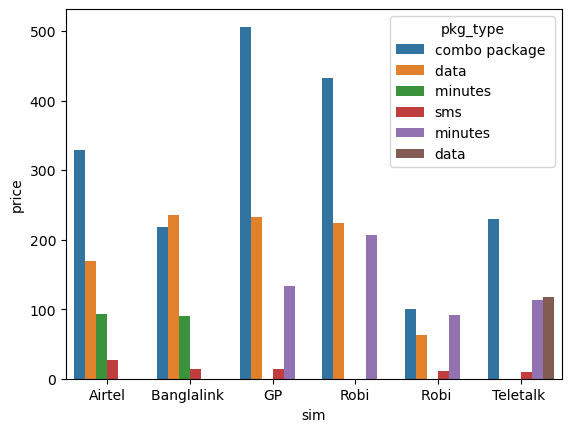

In [18]:
sns.barplot(data=comparison_data , x="sim", y="price", hue="pkg_type")